In [1]:
#Preamble
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as fit

In [2]:
d = np.load('sd1_pol_11_chunk_136.npz')
dd = d['arr_0']
f = np.linspace(0,125,len(dd[0,:]))

#The data array is "dd"
#"f" is frequency in MHz
#dd is 15624 x 2048. Dimension 0 (15624) is the time axis and dimension 1 (2048) is the frequency axis.


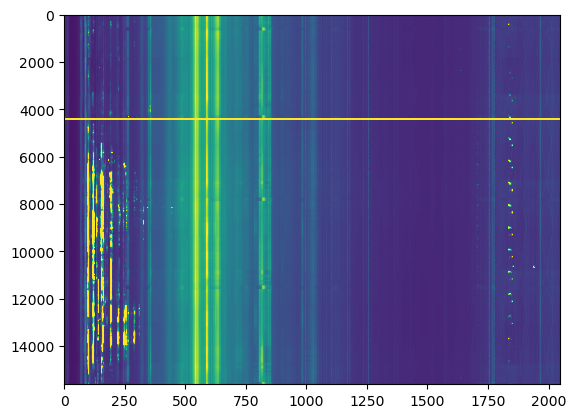

In [3]:
plt.imshow(dd, aspect='auto', vmin=0,vmax=1e8)


In [6]:
x= dd[0:4000, :]
median_power=np.median(x, axis=0)
threshold = 7e7
#y<=7e7
filter_median_power=np.copy(median_power)

filter_median_power[median_power >= 7e7] = 0

(0.0, 100000000.0)

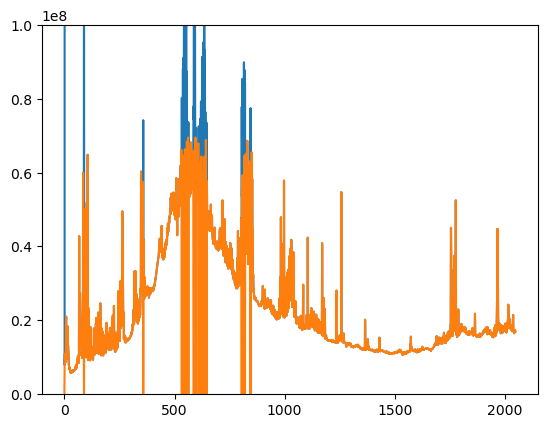

In [7]:
plt.plot(median_power)
plt.plot(filter_median_power)
plt.ylim(0, 1e8)


(0.0, 100000000.0)

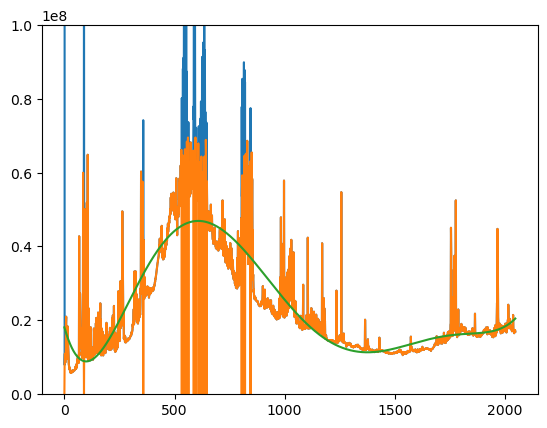

In [10]:
curve_coefficients = np.polyfit(f[filter_median_power > 0], filter_median_power[filter_median_power > 0], 6)
# Evaluate the polynomial at specific points to get the curve
curve = np.polyval(curve_coefficients, f)
plt.plot(median_power)
plt.plot(filter_median_power)
plt.plot(curve)
plt.ylim(0, 1e8)

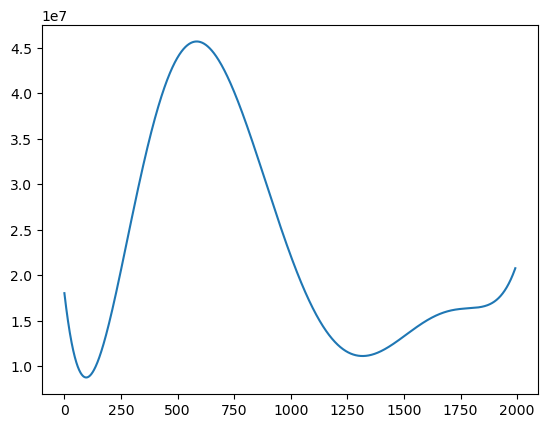

In [12]:
boolean_median_power =filter_median_power !=0


masked_median_power = filter_median_power[boolean_median_power]
masked_median_power
#curve 2
y_val = np.arange(0, 1993) #actuallly x_vals
curve_coefficients2 = np.polyfit(y_val, masked_median_power, 6)
# Evaluate the polynomial at specific points to get the curve
curve2 = np.polyval(curve_coefficients2, y_val)
plt.figure()
#plt.plot(masked_median_power)
plt.plot(curve2)
#plt.plot(curve)
#plt.ylim(0, 1e8)
plt.show()



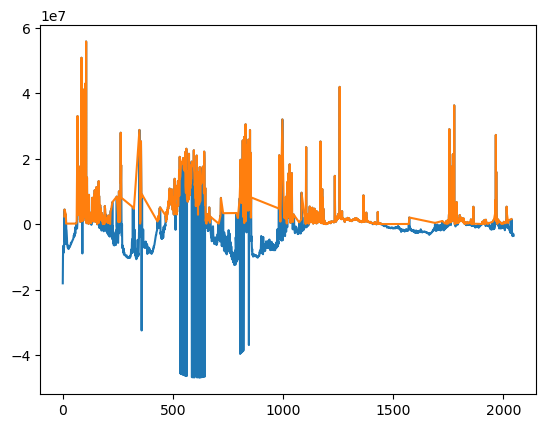

In [14]:
residuals = filter_median_power - curve
plt.figure()
plt.plot(residuals)
boolean_residuals= (residuals >= 0)
masked_residuals = residuals[boolean_residuals]

# Create an array of indices corresponding to True values
indices = np.arange(len(residuals))[boolean_residuals]

plt.plot(indices, masked_residuals, label='True values') #orange plot


(0.0, 100000000.0)

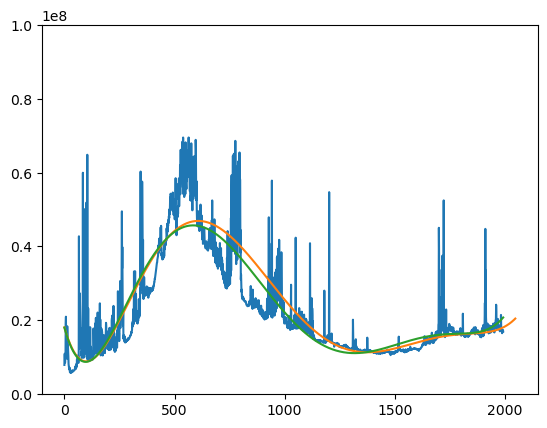

In [18]:
#plt.plot(median_power)
plt.plot(masked_median_power)
plt.plot(curve)
plt.plot(curve2)
plt.ylim(0, 1e8)